<a href="https://colab.research.google.com/github/kaindoh/Financial-Inclusion-Data-Analysis/blob/master/Individuals_are_most_likely_to_have_or_use_a_bank_account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# **Loading Files**

In [0]:
df=pd.read_csv("Financial Dataset - 1.csv")
descr=pd.read_csv("VariableDefinitions.csv")

In [0]:
#Displaying the description
descr

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#**Understanding the Dataset**

In [0]:
#Display the the dataset
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
3093,Kenya,2018,uniqueid_3094,No,Urban,Yes,6.0,33.0,Female,Head of Household,Married/Living together,Secondary education,Informally employed
2038,Kenya,2018,uniqueid_2039,No,Rural,Yes,3.0,26.0,Female,Spouse,Married/Living together,Primary education,Remittance Dependent
18178,Tanzania,2017,uniqueid_3376,No,Urban,No,2.0,24.0,Female,Spouse,Single/Never Married,Primary education,Informally employed
7247,Rwanda,2016,uniqueid_1180,No,Rural,No,4.0,27.0,Female,Head of Household,Single/Never Married,Primary education,Other Income
6750,Rwanda,2016,uniqueid_683,No,Urban,Yes,7.0,30.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [0]:
#The review of dataset
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


(23524, 13)

In [0]:
#Statistics review
df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# **Cleaning dataset**

In [0]:
#knowing the column names
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
#Getting the column names uniform
df.columns=df.columns.str.lower().str.replace(' ','_')

In [0]:
#display of the uniform columns
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
#checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
#checking the data types for various columns
df.dtypes


country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

In [0]:
#Dropping null values since tey are not as many
df.dropna(inplace=True)

In [0]:
#confirming whether the null values are dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [0]:
#checking for duplcates
df[df.duplicated()]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job


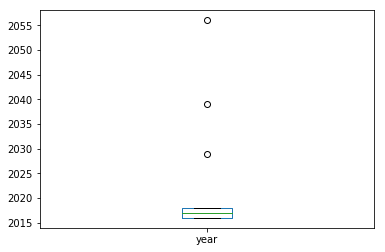

In [0]:
#checking for outliers
df['year'].plot(kind='box')

In [0]:
#Getting unique years
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#Removing 2029 2056 and 2038year_outliers=df[df.year>2019].index
df.drop(year_outliers,inplace=True)

In [0]:
#Displaying the remaining years
df.year.unique()

array([2018, 2016, 2017])

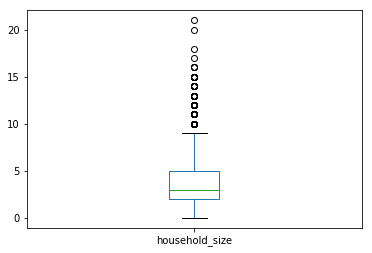

In [0]:
#checking for outliers in household_size
df.household_size.plot(kind='box')

In [0]:
#Getting unique values of household_size
df.household_size.unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

I will not drop household_size outliers because a maximum of 21 people in one house is reasonable

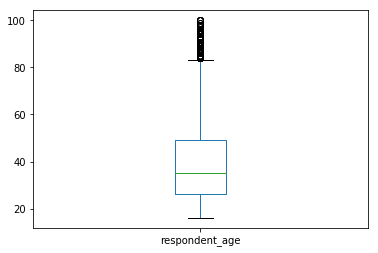

In [0]:
#checking for outliers in respondent_age
df.respondent_age.plot(kind='box')

In [0]:
#Getting unique values of respondent_age
df.respondent_age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

I will not drop respondent_age outliers because a maximum of 100 is also reasonable